In [50]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG","001","002"])
segment_image.load_model("./mask_rcnn_models/mask_rcnn_model.007-0.205943.h5")
segment_image.segmentImage("./model_test3.jpg", show_bboxes=True, output_image_name="sample_out3.jpg")
segmask, output = segment_image.segmentImage("sample_out3.jpg", show_bboxes= True)

Processed Image saved successfully in your current working directory.


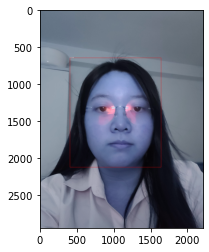

In [51]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("sample_out3.jpg")
plt.imshow(img)

In [52]:
segmask

{'rois': array([[ 632,  401, 2123, 1616]]),
 'class_ids': array([2]),
 'scores': array([0.9673815], dtype=float32),
 'masks': array([[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        ...,
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]])}

In [47]:
segment_image = custom_segmentation(infer_speed = "rapid")
segment_image.inferConfig(num_classes= 2, class_names= ["BG","001","002"])
segment_image.load_model("./mask_rcnn_models/mask_rcnn_model.007-0.205943.h5")
segment_image.segmentImage("./model_test4.jpg", show_bboxes=True, output_image_name="sample_out4.jpg")
segmask4, output = segment_image.segmentImage("sample_out4.jpg", show_bboxes= True)


Processed Image saved successfully in your current working directory.


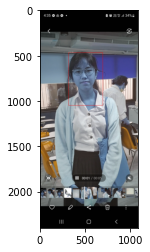

In [48]:
img = cv2.imread("sample_out4.jpg")
plt.imshow(img)

In [49]:
segmask4

{'rois': array([[ 492,  332, 1071,  669]]),
 'class_ids': array([1]),
 'scores': array([0.8217908], dtype=float32),
 'masks': array([[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        ...,
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],
 
        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]])}

In [ ]:
import pixellib
from pixellib.instance import custom_segmentation
import cv2
ids = [1,2]
check = []
class_names = ["BG","001","002"]
segment_frame = custom_segmentation()
segment_frame.inferConfig(network_backbone="resnet101",num_classes= 2, class_names= ["BG","001","002"])
segment_frame.load_model("./mask_rcnn_models/mask_rcnn_model.007-0.205943.h5")

capture = cv2.VideoCapture(0)
while True:    
    ret, frame = capture.read()
    segmask, output=segment_frame.segmentFrame(frame,show_bboxes=True)
    
    if (segmask['class_ids'][0] in ids) and segmask['scores'][0]>0.96 and segmask['class_ids'][0] not in check:
        segmask,output=segment_frame.segmentFrame(frame,output_image_name= str(class_namessegmask['class_ids'][0])+'.jpg') 
        check.append(segmask['class_ids'][0])
        
    #string = "checked: "+str(check)
    #frame = cv2.putText(frame, string, org, font, 
                   #fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow("frame", frame)
    if cv2.waitKey(25) & 0xff == ord('q'): 
        break